# Flight price regression problem evaluation

In [1]:
# importint the require libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# now read the dataset to the note book
# the dataset is an excel file
flight_data = pd.read_excel('Data_Train.xlsx')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# find out the shape of the data
flight_data.shape

(10683, 11)

In [4]:
# get more information about the data
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# we see that there are 10683 rows and 11 columns, Route and Total_Stops have 1 null value in each column, and most columns are 
# of python object data type leaving Price column as the only one with int64 data type

In [6]:
# get the null values
flight_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# we can opt to drop the row containing the null value
flight_data.dropna(inplace=True)

In [8]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# now some columns like Date_of_Journey, Dep_Time, and Arrival_Time need to be transformed to date and time
# get those columns first
flight_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
# function to convert to date and time
def convert_date_time(col):
    flight_data[col] = pd.to_datetime(flight_data[col])

# list of the columns to be converted
date_time = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']

# looping through the list and converting them
for i in date_time:
    convert_date_time(i)

In [11]:
# view to data's datatypes
flight_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-30 05:50:00,2021-11-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-30 18:05:00,2021-11-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-30 16:50:00,2021-11-30 21:35:00,4h 45m,1 stop,No info,13302


In [13]:
# now we want to access the year, month, and day from the Date_of_journey column
flight_data['journey_year'] = flight_data['Date_of_Journey'].dt.year
flight_data['journey_month'] = flight_data['Date_of_Journey'].dt.month
flight_data['journey_day'] = flight_data['Date_of_Journey'].dt.day

In [14]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-30 05:50:00,2021-11-30 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-30 18:05:00,2021-11-30 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-30 16:50:00,2021-11-30 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3


In [15]:
# now drop the Date_of_Journey column
flight_data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-30 05:50:00,2021-11-30 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-11-30 18:05:00,2021-11-30 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-11-30 16:50:00,2021-11-30 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3


In [17]:
# we can now access the time in hours and mins from Dep_time and Arrival_Time columns

def get_hours(col):
    flight_data[col + '_hours'] = flight_data[col].dt.hour

def get_mins(col):
    flight_data[col + '_mins'] = flight_data[col].dt.minute

def remove_column(col):
    flight_data.drop(col, axis=1, inplace=True)

In [18]:
# Dep_time
get_hours('Dep_Time')
get_mins('Dep_Time')
remove_column('Dep_Time')

In [19]:
# Arrival_Time
get_hours('Arrival_Time')
get_mins('Arrival_Time')
remove_column('Arrival_Time')

In [20]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [21]:
# now as we can see the Duration column has both h and m while other are lacking either h or min so we need to add the to make 
# the column consistent

In [22]:
# the h and m are separated by a space ('') so we need to split it and find out the total number of indexes in each
# example
'4h 45m'.split(' ')

['4h', '45m']

In [23]:
len('4h 45m'.split(' '))

2

In [24]:
# now we know that each row in that column as 2 indexs, so we will put the whole column in a list and give it conditions
duration = list(flight_data['Duration'])

# loop through that list
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
flight_data['Duration'] = duration
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [25]:
# extracting the hours and minutes separately from Duration column
'19h 0m'.split(' ')[0]

'19h'

In [26]:
'19h 0m'.split(' ')[0][0]

'1'

In [27]:
'19h 0m'.split(' ')[0][0:]

'19h'

In [28]:
# extract the 19 to eliminate the h 
'19h 0m'.split(' ')[0][0:-1]

'19'

In [29]:
# extract the 0 to eliminate the m
'19h 0m'.split(' ')[1][0:-1]

'0'

In [30]:
# now create a function the extract them separately
def hours(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [31]:
# apply the functions
flight_data['Duration_hours'] = flight_data['Duration'].apply(hours)
flight_data['Duration_mins'] = flight_data['Duration'].apply(minutes)

# drop Duration column
remove_column('Duration')

flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [32]:
# now the Route column has a problem that needs to be fixed

# example
'DEL → LKO → BOM → COK'.split('→')

['DEL ', ' LKO ', ' BOM ', ' COK']

In [33]:
route = flight_data['Route']
route.head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [34]:
route.str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [35]:
# use the actua; column
flight_data['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [40]:
# accessing each index separately
flight_data['Route_1'] = flight_data['Route'].str.split('→').str[0]
flight_data['Route_2'] = flight_data['Route'].str.split('→').str[1]
flight_data['Route_3'] = flight_data['Route'].str.split('→').str[2]
flight_data['Route_4'] = flight_data['Route'].str.split('→').str[3]

In [41]:
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN


In [42]:
# romove the route column
remove_column('Route')

In [43]:
# check the data type
flight_data.dtypes

Airline               object
Source                object
Destination           object
Total_Stops           object
Additional_Info       object
Price                  int64
journey_year           int64
journey_month          int64
journey_day            int64
Dep_Time_hours         int64
Dep_Time_mins          int64
Arrival_Time_hours     int64
Arrival_Time_mins      int64
Duration_hours        object
Duration_mins         object
Route_1               object
Route_2               object
Route_3               object
Route_4               object
dtype: object

In [44]:
# converting this columns into int
flight_data['Duration_hours'] = flight_data['Duration_hours'].astype(int)
flight_data['Duration_mins'] = flight_data['Duration_mins'].astype(int)

In [45]:
flight_data.dtypes

Airline               object
Source                object
Destination           object
Total_Stops           object
Additional_Info       object
Price                  int64
journey_year           int64
journey_month          int64
journey_day            int64
Dep_Time_hours         int64
Dep_Time_mins          int64
Arrival_Time_hours     int64
Arrival_Time_mins      int64
Duration_hours         int32
Duration_mins          int32
Route_1               object
Route_2               object
Route_3               object
Route_4               object
dtype: object

In [46]:
# separating feature from labels
X = flight_data.drop('Price', axis=1)
y = flight_data['Price']

In [47]:
# view the features
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,2019,3,24,22,20,1,10,2,50,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,2019,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,No info,2019,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,2019,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN


In [48]:
# view the labels 
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [49]:
# find if there are null values in the features
X.isna().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
journey_year             0
journey_month            0
journey_day              0
Dep_Time_hours           0
Dep_Time_mins            0
Arrival_Time_hours       0
Arrival_Time_mins        0
Duration_hours           0
Duration_mins            0
Route_1                  0
Route_2                  0
Route_3               3491
Route_4               9116
dtype: int64

In [50]:
# fill the null values
for i in ['Route_3', 'Route_4']:
    X[i].fillna('None', inplace=True)

In [51]:
X.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
journey_year          0
journey_month         0
journey_day           0
Dep_Time_hours        0
Dep_Time_mins         0
Arrival_Time_hours    0
Arrival_Time_mins     0
Duration_hours        0
Duration_mins         0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
dtype: int64

In [53]:
# separate the categorical and numerical columns

# categorical
cat_cols = [col for col in X.columns if X[col].dtype == 'object']

# numerical
num_cols = [col for col in X.columns if X[col].dtype != 'object']

In [55]:
# view cat_cols
cat_cols

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4']

In [56]:
num_cols

['journey_year',
 'journey_month',
 'journey_day',
 'Dep_Time_hours',
 'Dep_Time_mins',
 'Arrival_Time_hours',
 'Arrival_Time_mins',
 'Duration_hours',
 'Duration_mins']

In [57]:
categorical = X[cat_cols]
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None


In [58]:
# get the value counts in Airline column
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

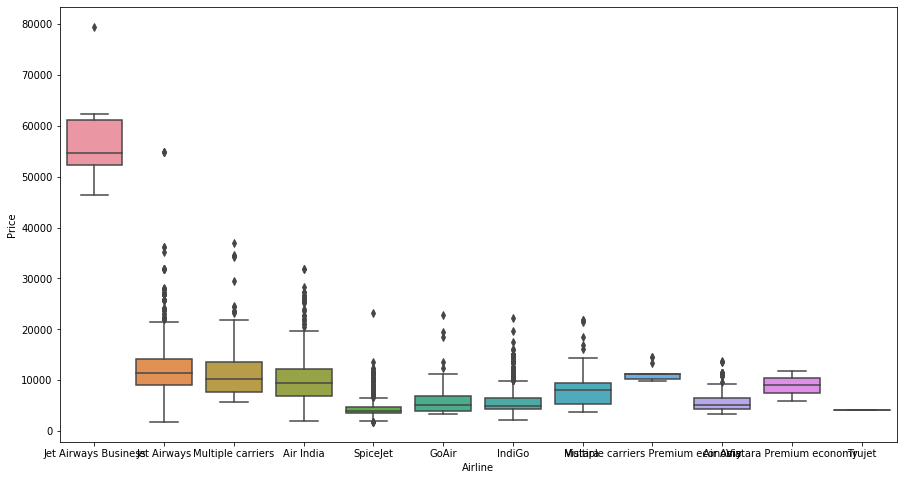

In [67]:
# visualize its relationship with the price column
plt.figure(figsize=(15, 8))
sns.boxplot(x='Airline', y='Price', data= flight_data.sort_values('Price', ascending=False))

In [68]:
# we can see there is no much difference in this column 

In [69]:
# view the values of the source column
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

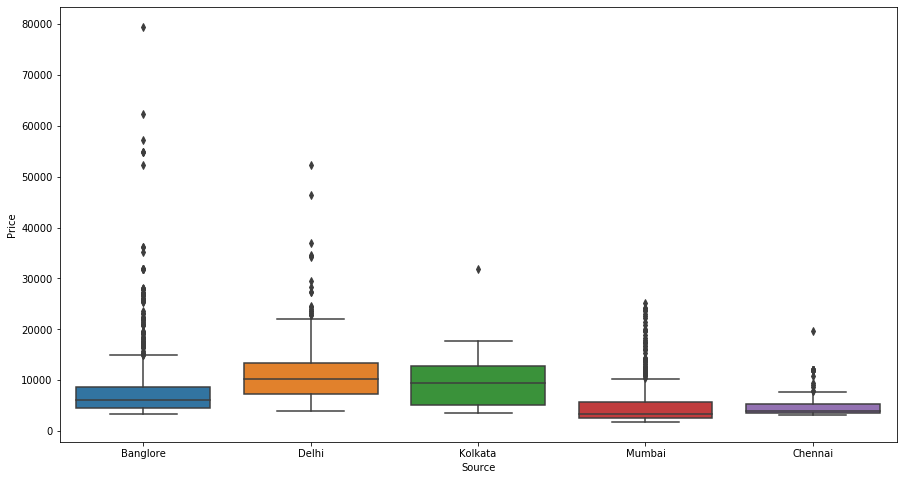

In [70]:
# visualize it againist price
plt.figure(figsize=(15, 8))
sns.boxplot(x='Source', y='Price', data = flight_data.sort_values('Price', ascending=False))

In [71]:
# view the values in the Destination
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

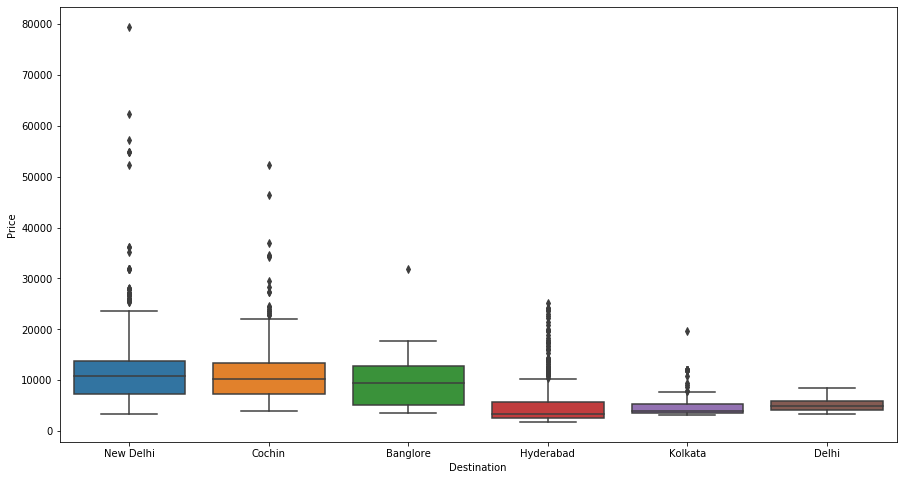

In [72]:
# get the visualization
plt.figure(figsize=(15, 8))
sns.boxplot(x='Destination', y='Price', data = flight_data.sort_values('Price', ascending=False))

In [73]:
# values in the Total_Stops
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

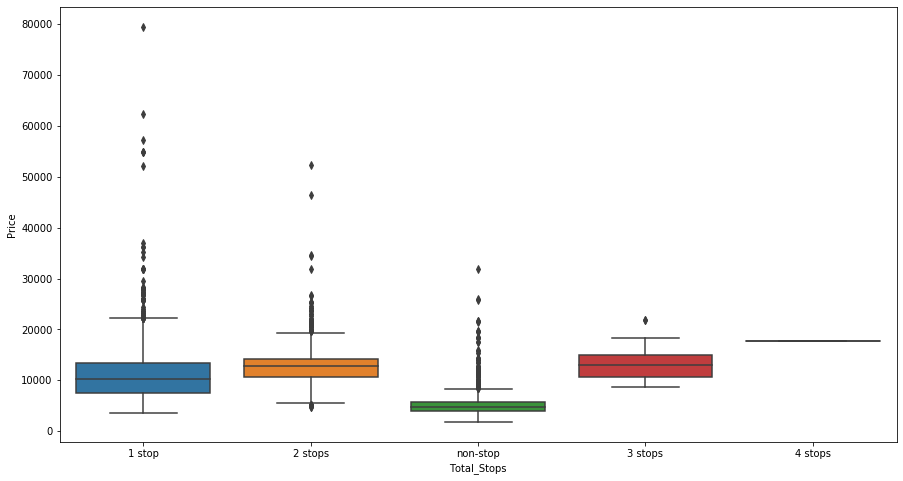

In [74]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Total_Stops', y='Price', data=flight_data.sort_values('Price', ascending=False))

In [75]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None


In [77]:
# values in Additional_info
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

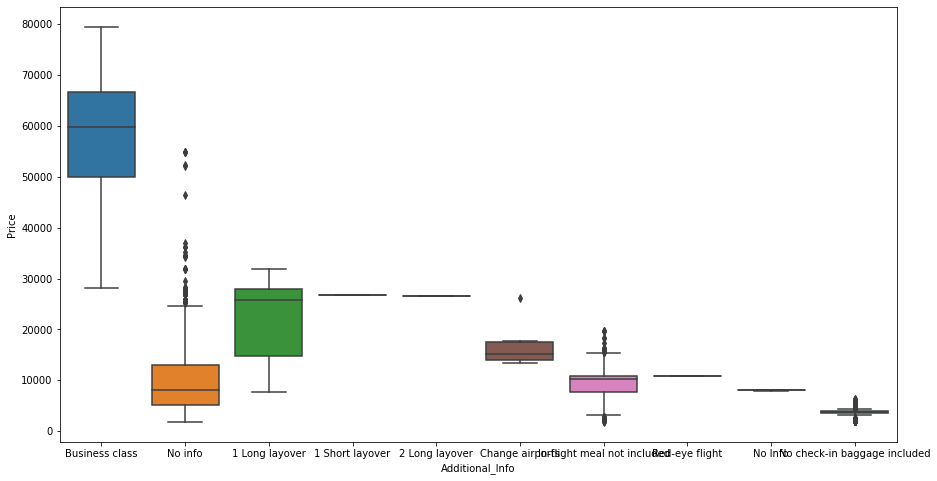

In [78]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Additional_Info', y='Price', data=flight_data.sort_values('Price', ascending=False))

In [79]:
# now this columns values are un-proposional and can affect our model negatively so we need to remove it
categorical.drop('Additional_Info', axis=1, inplace=True)

C:\Users\Aernest njuki\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,None


In [81]:
# now we wnat to encode the text values inthe categorical columns into integers but differently

# for Airline, Source, and Destination we get dummys to encode them
airline = pd.get_dummies(categorical['Airline'], drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [82]:
source = pd.get_dummies(categorical['Source'], drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [83]:
destination = pd.get_dummies(categorical['Destination'], drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [85]:
# for Total_Stops, Route_1, Route_2, route_3, route_4 we will use the label encode to give each value a unique number
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in ['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4']:
    categorical[i] = encoder.fit_transform(categorical[i])
    

categorical.head()

C:\Users\Aernest njuki\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,4,0,13,29,13
1,Air India,Kolkata,Banglore,1,2,25,1,3
2,Jet Airways,Delhi,Cochin,1,3,32,4,5
3,IndiGo,Kolkata,Banglore,0,2,34,3,13
4,IndiGo,Banglore,New Delhi,0,0,34,8,13


In [86]:
# now we need to concatenate the other columns that were converted into integers
categorical = pd.concat([categorical, airline, source, destination], axis=1)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,4,0,13,29,13,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,2,25,1,3,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,0,0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,2,34,3,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,0,34,8,13,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
# drop columns
categorical.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
categorical.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,4,0,13,29,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,25,1,3,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,32,4,5,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,2,34,3,13,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,34,8,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
# now concatenate the converted categorical cols and numerical cols
X = pd.concat([categorical, X[num_cols]], axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,New Delhi,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
0,4,0,13,29,13,0,0,1,0,0,...,1,2019,3,24,22,20,1,10,2,50
1,1,2,25,1,3,1,0,0,0,0,...,0,2019,1,5,5,50,13,15,7,25
2,1,3,32,4,5,0,0,0,1,0,...,0,2019,9,6,9,25,4,25,19,0
3,0,2,34,3,13,0,0,1,0,0,...,0,2019,12,5,18,5,23,30,5,25
4,0,0,34,8,13,0,0,1,0,0,...,1,2019,1,3,16,50,21,35,4,45


In [90]:
pd.set_option('max_columns', 34)

In [91]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_year,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
0,4,0,13,29,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,3,24,22,20,1,10,2,50
1,1,2,25,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,1,5,5,50,13,15,7,25
2,1,3,32,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2019,9,6,9,25,4,25,19,0
3,0,2,34,3,13,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,12,5,18,5,23,30,5,25
4,0,0,34,8,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,1,3,16,50,21,35,4,45


In [94]:
X['journey_year'].unique()

array([2019], dtype=int64)

In [95]:
X.drop('journey_year', axis=1, inplace=True)

In [96]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_month,journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
0,4,0,13,29,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,24,22,20,1,10,2,50
1,1,2,25,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,7,25
2,1,3,32,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,19,0
3,0,2,34,3,13,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,5,25
4,0,0,34,8,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45


In [97]:
X.shape

(10682, 33)

In [98]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [102]:
# check for the outliers in the labels

def outlier(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax= ax2)

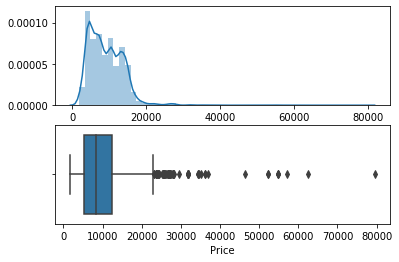

In [103]:
outlier(flight_data, 'Price')

In [104]:
# we cannot operate the reduction of the oytlier coz we had alread separated the features and labels so neva separate again b4 feature engineering is complete

In [109]:
# best feature selection with MUTUAL_INFO_CLASSIF
from sklearn.feature_selection import mutual_info_classif

# pass the X and y values
feat_sel = mutual_info_classif(X, y)
feat_sel

array([1.5488776 , 2.02082869, 2.80921939, 2.25850849, 1.48430128,
       0.7617742 , 0.11455631, 0.65709525, 0.90910918, 0.        ,
       0.57948585, 0.02122772, 0.31465086, 0.        , 0.22282432,
       0.        , 0.17291764, 1.55801059, 0.87243252, 0.28598224,
       1.53775358, 0.40283588, 0.28190927, 0.18075166, 0.36489364,
       0.84906663, 1.05721261, 1.4197312 , 1.1937154 , 1.85680205,
       1.55003115, 1.79704893, 1.07752656])

In [110]:
best_feats = pd.DataFrame(feat_sel, index=X.columns)
best_feats

,0
Total_Stops,1.548878
Route_1,2.020829
Route_2,2.809219
Route_3,2.258508
Route_4,1.484301
Air India,0.761774
GoAir,0.114556
IndiGo,0.657095
Jet Airways,0.909109
Jet Airways Business,0.000000


In [111]:
best_feats.columns = ['important']
best_feats.sort_values('important', ascending=False)

,important
Route_2,2.809219
Route_3,2.258508
Route_1,2.020829
Arrival_Time_hours,1.856802
Duration_hours,1.797049
Delhi,1.558011
Arrival_Time_mins,1.550031
Total_Stops,1.548878
Cochin,1.537754
Route_4,1.484301


In [112]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 33), (2137, 33), (8545,), (2137,))

In [113]:
# using the RANDOMFORESTREGRESSOR

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, y_train)

C:\Users\Aernest njuki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
# print the training score
print('Training score : ', forest_reg.score(X_train, y_train))

Training score :  0.9440290724633877


In [117]:
# making prediction with training data
y_pred = forest_reg.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))

MAE :  585.3378276351435
MSE :  1185999.062983818
RMSE :  1089.0358410005697


In [122]:
# cross validatuion of the training data 
from sklearn.model_selection import cross_val_score

score = cross_val_score(forest_reg, X_train, y_train, cv=5)
score

array([0.8202761 , 0.78623348, 0.78435703, 0.76884999, 0.78462795])

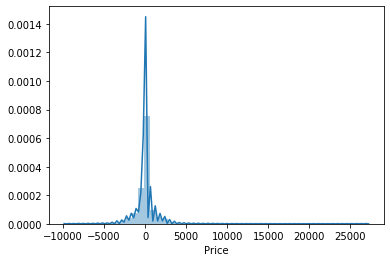

In [123]:
sns.distplot(y_train - y_pred)

In [126]:
# making prediction with test data
y_test_pred = forest_reg.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))

MAE :  1200.131671054729
MSE :  4786719.269245858
RMSE :  2187.857232372775


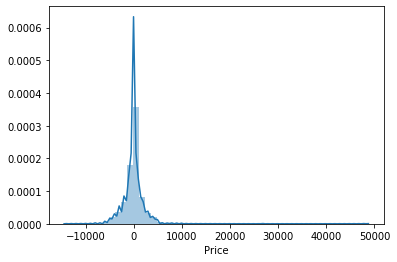

In [127]:
sns.distplot(y_test - y_test_pred)